In [1]:
#!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=20c703835bba1f3aa9e28e5e8b4e222d9b3245d58fb42e90cbf9180e47fba572
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=f52dfaad232afa3f53fc9a88fc2c2f7bb81e98443f77bb1eb882911ac853e1e9
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist # loading the data from keras library

In [3]:
(train_images, train_labels), (test_images, test_tabels) = data.load_data() 

In [4]:
class_names = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'] ### posible results from the nd.array

In [5]:
train_images = train_images/255.0
test_images = test_images/255

In [6]:
#As the dataset is based on images we must flatten
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # how the image is stablished, input layer
    keras.layers.Dense(128, activation='relu'),   # first layer using relu function using 128 neurons
    keras.layers.Dense(10, activation = 'softmax') # second layer using softmax function using 10 neurons
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
#training model
model.fit(train_images, train_labels, epochs=5) #epochs for how many times it will see every image

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6369 - accuracy: 0.7781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3859 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8905


In [8]:
#Model evaluation 
test_loss, test_acc = model.evaluate(test_images, test_tabels)
print('Tested Acc: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3654 - accuracy: 0.8701
Tested Acc:  0.8701000213623047


In [9]:
#Model prediction
prediction = model.predict(test_images)
print(prediction) # 10 values because of the ten neurons

[[4.6677374e-06 4.3533393e-07 1.0891265e-06 ... 1.0069879e-01
  1.2986554e-05 8.9899457e-01]
 [1.8277200e-06 4.3190049e-08 9.9933571e-01 ... 1.9039563e-14
  2.8504130e-07 1.5327408e-13]
 [5.2312839e-06 9.9999475e-01 1.5254029e-08 ... 4.2268688e-16
  7.2804589e-11 1.7650848e-13]
 ...
 [1.0040501e-03 6.2688019e-09 4.4214691e-04 ... 7.0684723e-07
  9.9747545e-01 1.9116332e-08]
 [2.9624928e-06 9.9994111e-01 5.0802527e-07 ... 4.3402734e-12
  2.1798224e-08 2.4706501e-09]
 [2.3890036e-04 4.5157176e-05 5.2612915e-04 ... 1.0631374e-01
  2.7754756e-03 4.4446628e-04]]


In [10]:
# how it is classifying with the actual product names
print(class_names[np.argmax(prediction[0])])

ankle boot


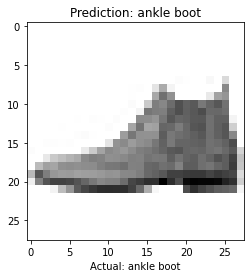

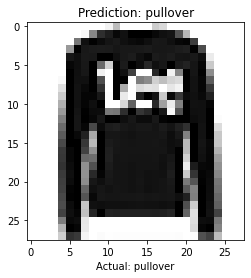

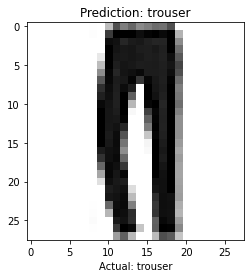

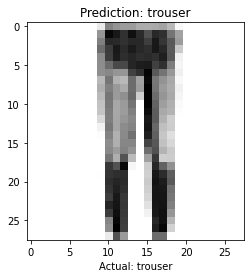

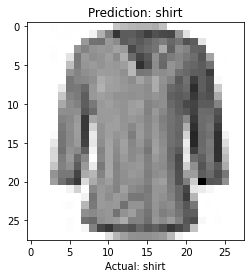

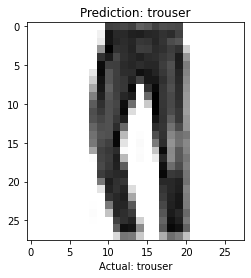

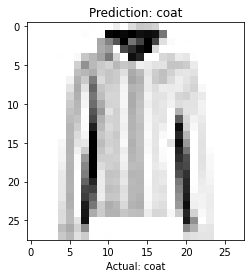

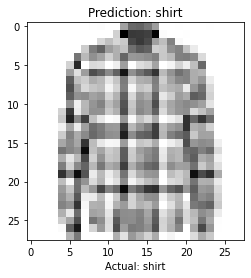

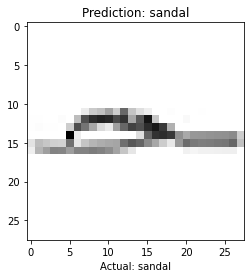

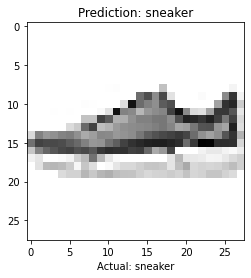

In [13]:
# prediction for every result
for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel('Actual: ' + class_names[test_tabels[i]])
    plt.title('Prediction: ' + class_names[np.argmax(prediction[i])])
    plt.show()